In [1]:
import pandas as pd

# Load business and review data
business_data = pd.read_json('./yelp_dataset/yelp_academic_dataset_business.json', lines=True)
review_data = pd.read_json('./yelp_dataset/yelp_academic_dataset_review.json', lines=True, dtype={'date': str})

# View the first few rows of data
print(business_data.head())
print(review_data.head())

              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.9555

In [2]:
# View all unique cities
unique_cities = business_data['city'].unique()
print(unique_cities)

['Santa Barbara' 'Affton' 'Tucson' ... 'Wales' 'UPPER MORELAND'
 'Apollo beach']


In [3]:
# Select 'Nashville' as the city for analysis
selected_city = 'Nashville'

# Filter all businesses in the selected city
city_business_data = business_data[business_data['city'] == selected_city]

# Extract all business_ids from city_business_data
business_ids = city_business_data['business_id'].tolist()

# Filter all reviews related to businesses in the selected city
city_review_data = review_data[review_data['business_id'].isin(business_ids)]

# Print basic statistics after sampling
print(f"Selected city: {selected_city}")
print(f"Number of businesses: {len(city_business_data)}")
print(f"Number of reviews: {len(city_review_data)}")

Selected city: Nashville
Number of businesses: 6971
Number of reviews: 451571


In [4]:
import os

directory_name = 'yelp_dataset'
if not os.path.exists(directory_name):
    os.makedirs(directory_name)

# Save the filtered data to the 'yelp_dataset' folder
business_json_path = os.path.join(directory_name, f'{selected_city}_business_subset.json')
review_json_path = os.path.join(directory_name, f'{selected_city}_review_subset.json')

city_business_data.to_json(business_json_path, orient='records', lines=True)
city_review_data.to_json(review_json_path, orient='records', lines=True)

print(f"Business and review data saved in the folder: {directory_name}")

Business and review data saved in the folder: yelp_dataset


In [5]:
import random

# Randomly select a business b1 from city_business_data
b1 = city_business_data.sample(n=1)
b1_id = b1['business_id'].values[0]

# Extract all reviews related to this business
b1_reviews = city_review_data[city_review_data['business_id'] == b1_id]['text']

# Print business information and number of reviews
print(f"Selected business: {b1['name'].values[0]}")
print(f"Number of reviews for this business: {len(b1_reviews)}")

Selected business: Visitor Information Center
Number of reviews for this business: 15


In [6]:
import spacy
from collections import Counter

# Load spaCy language model
nlp = spacy.load("en_core_web_sm")

# Use spaCy's stop words list
stop_words = nlp.Defaults.stop_words

d:\IDEs\Anaconda3\envs\core\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Count word frequencies before stemming
token_counts_b1_before = Counter([token for review in b1_reviews for token in review.lower().split() if token not in stop_words])

# Function for tokenization and stemming
def preprocess(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return tokens

# Process all reviews
b1_tokens = [preprocess(review) for review in b1_reviews]

# Count word frequencies
token_counts_b1 = Counter([token for sublist in b1_tokens for token in sublist])

# List the top 10 most common words before and after stemming
print(f"Top 10 words before stemming for {b1['name'].values[0]}:", token_counts_b1_before.most_common(10))
print(f"Top 10 words after stemming for {b1['name'].values[0]}:", token_counts_b1.most_common(10))

Top 10 words before stemming for Visitor Information Center: [('nashville', 15), ('center', 14), ('music', 13), ('great', 10), ('city', 9), ('place', 8), ('visitor', 7), ('access', 6), ('downtown', 6), ('information', 6)]
Top 10 words after stemming for Visitor Information Center: [('Nashville', 19), ('center', 14), ('tour', 12), ('visitor', 11), ('Music', 10), ('visit', 10), ('great', 10), ('place', 9), ('attraction', 8), ('stop', 7)]


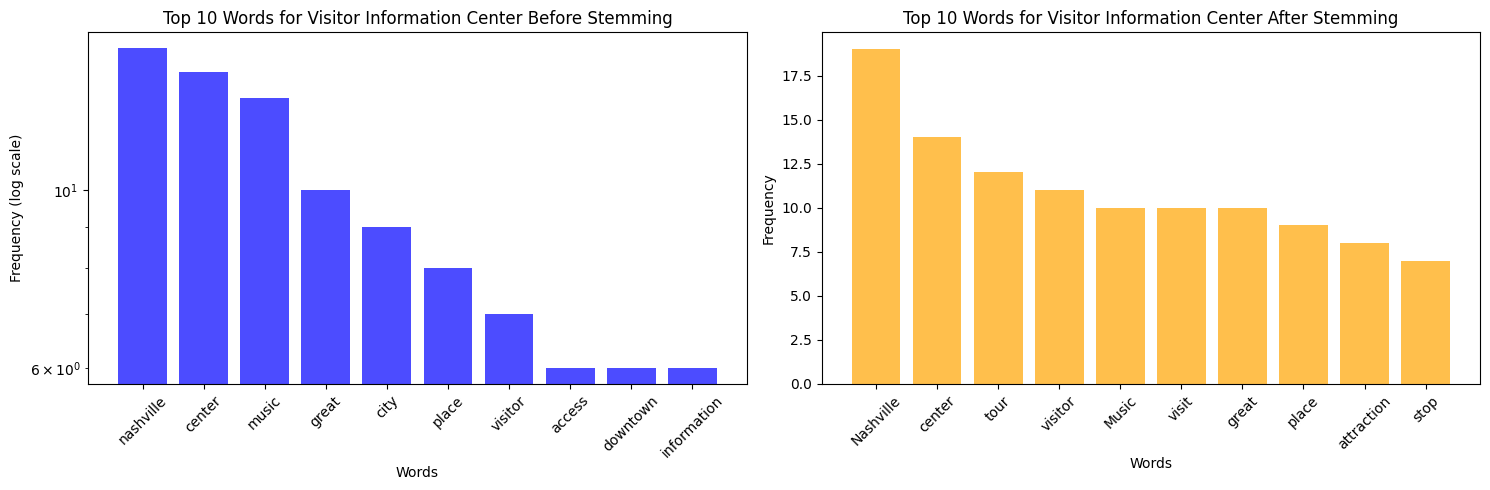

In [8]:
import matplotlib.pyplot as plt

# Get the most common words before stemming
common_tokens_b1_before = token_counts_b1_before.most_common(10)
words_b1_before, counts_b1_before = zip(*common_tokens_b1_before)

# Get the most common words after stemming
common_tokens_b1_after = token_counts_b1.most_common(10)
words_b1_after, counts_b1_after = zip(*common_tokens_b1_after)

# Create two subplots to show word frequency distribution before and after stemming
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot word frequency distribution before stemming
ax1.bar(words_b1_before, counts_b1_before, color='blue', alpha=0.7)
ax1.set_title(f"Top 10 Words for {b1['name'].values[0]} Before Stemming")
ax1.set_xlabel("Words")
ax1.set_ylabel("Frequency (log scale)")
ax1.set_yscale('log')
ax1.set_xticks(range(len(words_b1_before)))
ax1.set_xticklabels(words_b1_before, rotation=45)

# Plot word frequency distribution after stemming
ax2.bar(words_b1_after, counts_b1_after, color='orange', alpha=0.7)
ax2.set_title(f"Top 10 Words for {b1['name'].values[0]} After Stemming")
ax2.set_xlabel("Words")
ax2.set_ylabel("Frequency")
ax2.set_xticks(range(len(words_b1_after)))
ax2.set_xticklabels(words_b1_after, rotation=45)

# Display the chart
plt.tight_layout()
plt.show()

In [9]:
# Randomly select another business b2 from city_business_data
b2 = city_business_data.sample(n=1)
b2_id = b2['business_id'].values[0]

# Extract all reviews related to this business
b2_reviews = city_review_data[city_review_data['business_id'] == b2_id]['text']

# Print business information and number of reviews
print(f"Selected business: {b2['name'].values[0]}")
print(f"Number of reviews for this business: {len(b2_reviews)}")


Selected business: The Showroom
Number of reviews for this business: 13


In [10]:
# Count word frequencies before stemming
token_counts_b2_before = Counter([token for review in b2_reviews for token in review.lower().split() if token not in stop_words])

# Process all reviews for b2
b2_tokens = [preprocess(review) for review in b2_reviews]

# Count word frequencies
token_counts_b2 = Counter([token for sublist in b2_tokens for token in sublist])

# List the top 10 most common words before and after stemming
print(f"Top 10 words before stemming for {b2['name'].values[0]}:", token_counts_b2_before.most_common(10))
print(f"Top 10 words after stemming for {b2['name'].values[0]}:", token_counts_b2.most_common(10))

Top 10 words before stemming for The Showroom: [('dress', 12), ('find', 8), ('rent', 8), ('perfect', 7), ('great', 6), ('showroom', 6), ('went', 6), ("didn't", 6), ('event', 6), ('called', 6)]
Top 10 words after stemming for The Showroom: [('dress', 23), ('find', 11), ('event', 10), ('rent', 9), ('ask', 9), ('perfect', 7), ('experience', 7), ('need', 7), ('go', 7), ('tell', 7)]


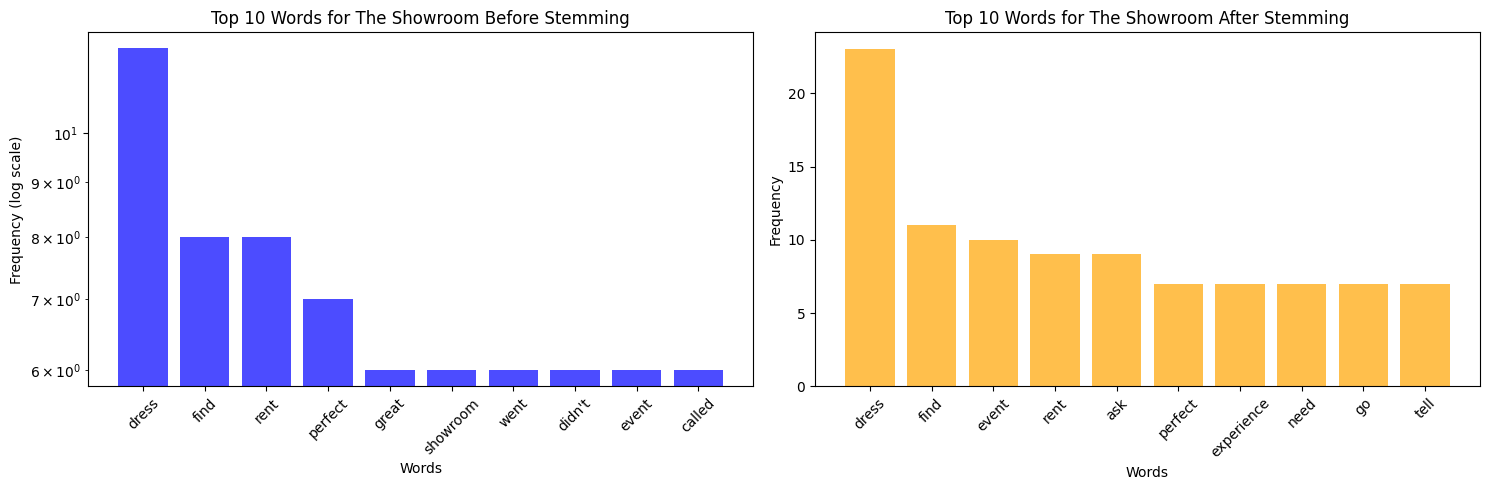

In [11]:
# Get the most common words before stemming
common_tokens_b2_before = token_counts_b2_before.most_common(10)
words_b2_before, counts_b2_before = zip(*common_tokens_b2_before)

# Get the most common words after stemming
common_tokens_b2_after = token_counts_b2.most_common(10)
words_b2_after, counts_b2_after = zip(*common_tokens_b2_after)

# create two subplots to show word frequency distribution before and after stemming
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot word frequency distribution before stemming
ax1.bar(words_b2_before, counts_b2_before, color='blue', alpha=0.7)
ax1.set_title(f"Top 10 Words for {b2['name'].values[0]} Before Stemming")
ax1.set_xlabel("Words")
ax1.set_ylabel("Frequency (log scale)")
ax1.set_yscale('log')
ax1.set_xticks(range(len(words_b2_before))) 
ax1.set_xticklabels(words_b2_before, rotation=45)

# Plot word frequency distribution after stemming
ax2.bar(words_b2_after, counts_b2_after, color='orange', alpha=0.7)
ax2.set_title(f"Top 10 Words for {b2['name'].values[0]} After Stemming")
ax2.set_xlabel("Words")
ax2.set_ylabel("Frequency")
ax2.set_xticks(range(len(words_b2_after)))
ax2.set_xticklabels(words_b2_after, rotation=45)

# Display the chart
plt.tight_layout()
plt.show()

In [12]:
from wordcloud import WordCloud

In [13]:
# Generate word cloud
def generate_wordcloud(token_counts, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(token_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

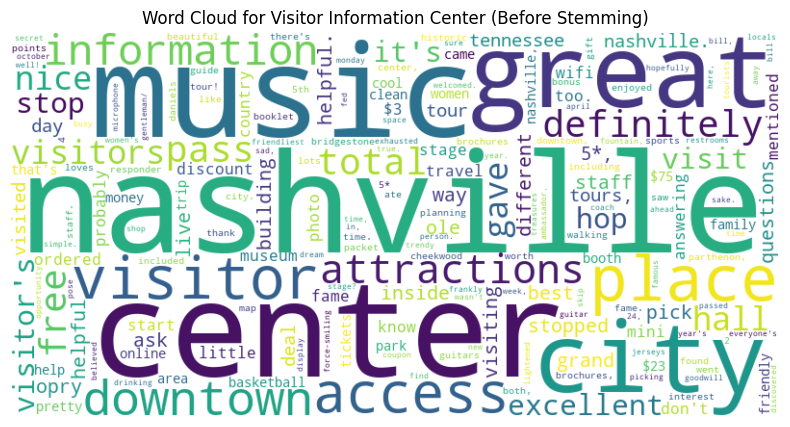

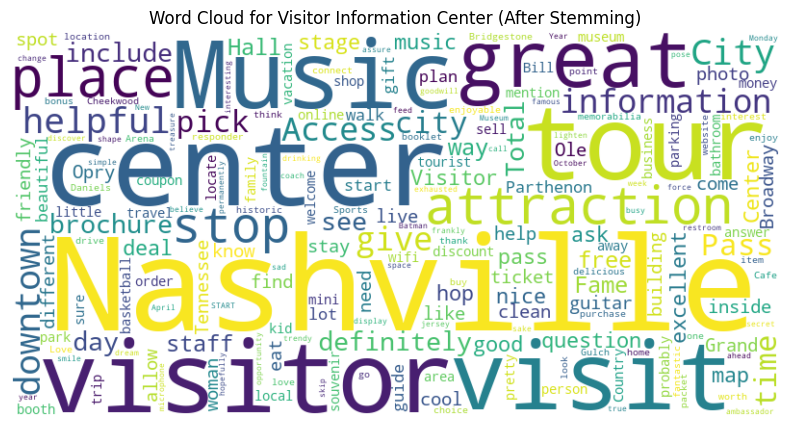

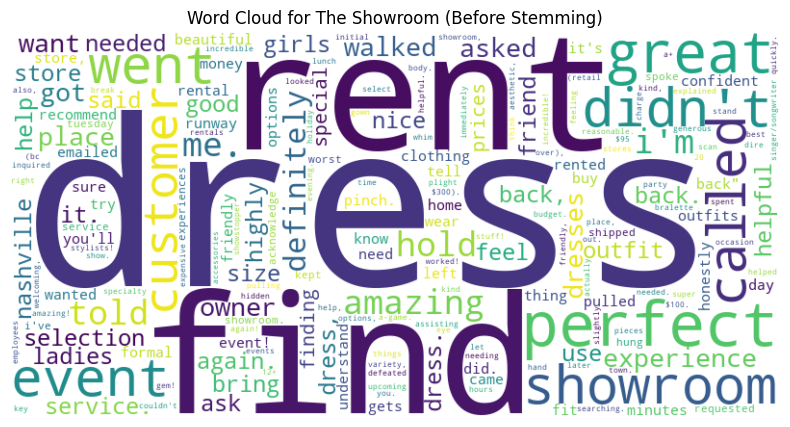

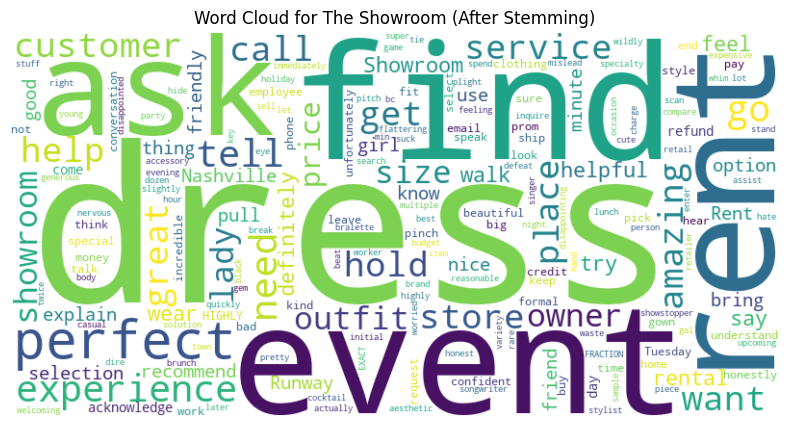

In [14]:
# Display word clouds for B1 and B2 (before and after stemming)
generate_wordcloud(token_counts_b1_before, f"Word Cloud for {b1['name'].values[0]} (Before Stemming)")
generate_wordcloud(token_counts_b1, f"Word Cloud for {b1['name'].values[0]} (After Stemming)")
generate_wordcloud(token_counts_b2_before, f"Word Cloud for {b2['name'].values[0]} (Before Stemming)")
generate_wordcloud(token_counts_b2, f"Word Cloud for {b2['name'].values[0]} (After Stemming)")

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Plot word frequency distribution bar chart
def plot_word_frequencies(business_name, tokens_before, tokens_after):
    # Get words and frequencies
    words_before, counts_before = zip(*tokens_before.most_common(10))
    words_after, counts_after = zip(*tokens_after.most_common(10))

    # Create index positions for x-axis
    x = np.arange(len(words_before)) 
    width = 0.35

    # Plot bar chart, bar positions are offset using x - width/2 and x + width/2
    fig, ax = plt.subplots(figsize=(10, 5))

    bars1 = ax.bar(x - width/2, counts_before, width, label='Before Stemming', color='blue', alpha=0.7)
    bars2 = ax.bar(x + width/2, counts_after, width, label='After Stemming', color='green', alpha=0.7)

    # Set x-axis ticks and labels
    ax.set_xticks(x)
    ax.set_xticklabels(words_before, rotation=45)

    # Set chart title and axis labels
    ax.set_title(f"Word Frequency Distribution for {business_name}")
    ax.set_xlabel("Words")
    ax.set_ylabel("Frequency (log scale)")
    ax.set_yscale('log')

    # Add legend
    ax.legend()

    # Display chart
    plt.tight_layout()
    plt.show()

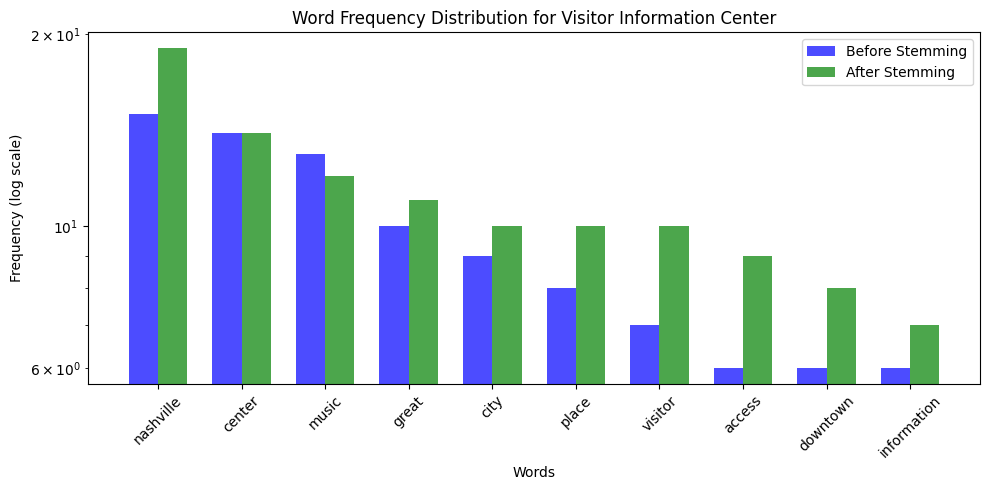

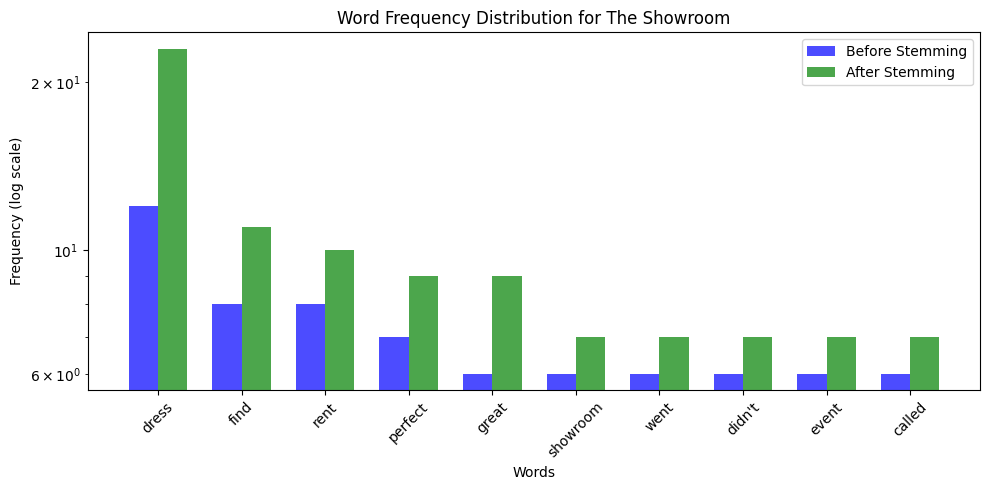

In [16]:
# Word frequency data for b1 (before and after stemming)
plot_word_frequencies(
    business_name=b1['name'].values[0],
    tokens_before=token_counts_b1_before,
    tokens_after=token_counts_b1
)

# Word frequency data for b2 (before and after stemming)
plot_word_frequencies(
    business_name=b2['name'].values[0],
    tokens_before=token_counts_b2_before,
    tokens_after=token_counts_b2
)

In [17]:
# Plot word frequency scatter plot
# If points fall on the y = x line, it means the word frequency remains unchanged before and after stemming.
# Points deviating from this line indicate significant changes in frequency.
def plot_frequency_scatter(business_name, token_counts_before, token_counts_after):
    # Find words that appear in both before and after stemming, and get their frequencies
    common_words = set(token_counts_before) & set(token_counts_after)
    before_freq = [token_counts_before[word] for word in common_words]
    after_freq = [token_counts_after[word] for word in common_words]

    # Plot scatter plot
    plt.figure(figsize=(8, 8))
    plt.scatter(before_freq, after_freq, alpha=0.7, color='green')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Frequency Before Stemming')
    plt.ylabel('Frequency After Stemming')
    plt.title(f"Word Frequency Comparison for {business_name}")
    plt.plot([1, max(before_freq)], [1, max(after_freq)], 'r--')
    plt.show()

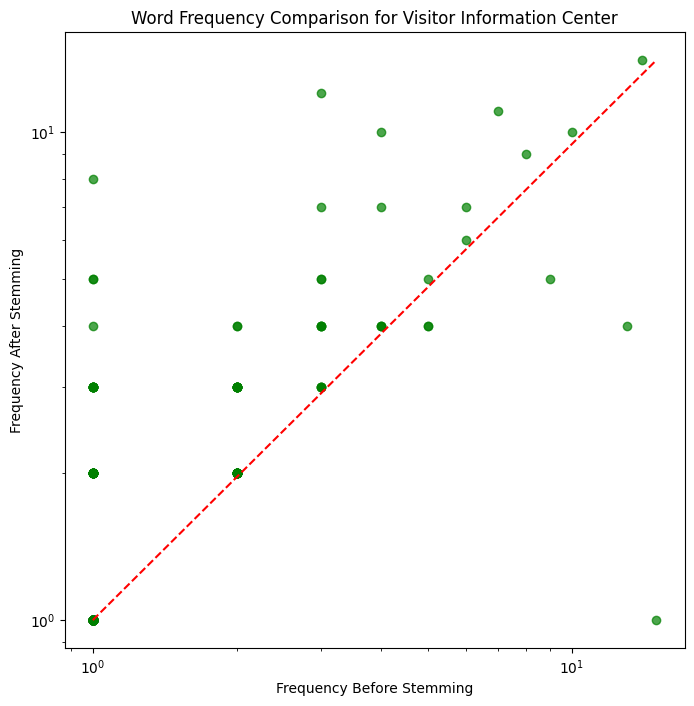

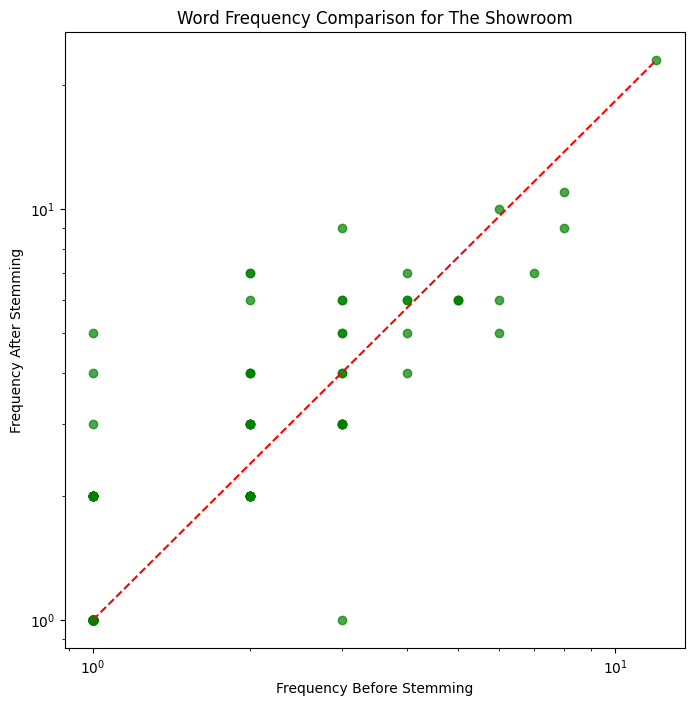

In [18]:
# Word frequency data for b1 (before and after stemming)
plot_frequency_scatter(
    business_name=b1['name'].values[0], 
    token_counts_before=token_counts_b1_before, 
    token_counts_after=token_counts_b1
)

# Word frequency data for b2 (before and after stemming)
plot_frequency_scatter(
    business_name=b2['name'].values[0], 
    token_counts_before=token_counts_b2_before, 
    token_counts_after=token_counts_b2
)

In [19]:
# Plot cumulative distribution function (CDF) of word frequencies
def plot_cdf(business_name, frequencies_before, frequencies_after):
    # Calculate cumulative distribution (CDF) of word frequencies
    sorted_freq_before = np.sort(frequencies_before)
    cdf_before = np.cumsum(sorted_freq_before) / np.sum(sorted_freq_before)

    sorted_freq_after = np.sort(frequencies_after)
    cdf_after = np.cumsum(sorted_freq_after) / np.sum(sorted_freq_after)

    # Plot CDF
    plt.figure(figsize=(10, 5))
    plt.plot(sorted_freq_before, cdf_before, label='Before Stemming', color='blue')
    plt.plot(sorted_freq_after, cdf_after, label='After Stemming', color='green')
    plt.xlabel('Word Frequency')
    plt.ylabel('Cumulative Probability')
    plt.title(f"CDF of Word Frequencies for {business_name}")
    plt.legend()
    plt.show()

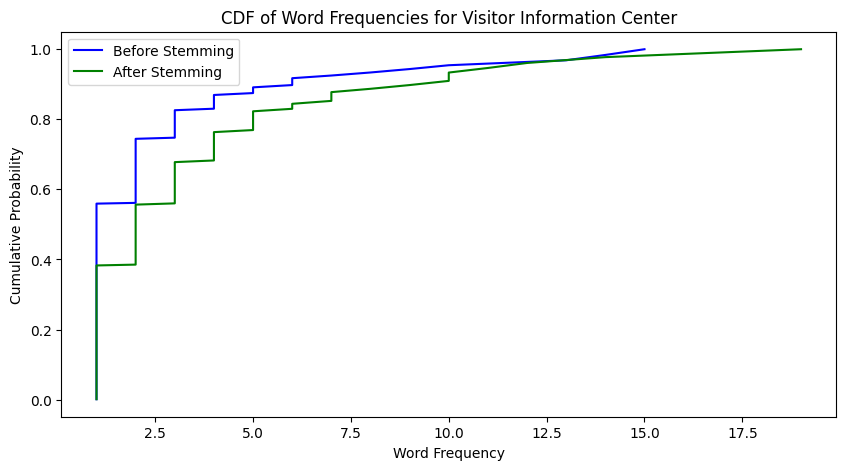

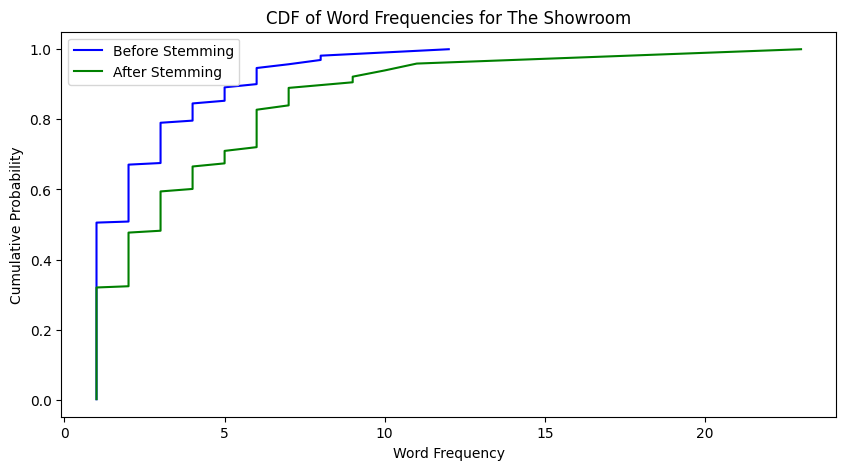

In [20]:
# Get word frequency lists for b1 and b2
frequencies_b1_before = list(token_counts_b1_before.values())
frequencies_b1_after = list(token_counts_b1.values())
frequencies_b2_before = list(token_counts_b2_before.values())
frequencies_b2_after = list(token_counts_b2.values())

# Plot CDF for b1
plot_cdf(b1['name'].values[0], frequencies_b1_before, frequencies_b1_after)

# Plot CDF for b2
plot_cdf(b2['name'].values[0], frequencies_b2_before, frequencies_b2_after)